In [43]:
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.4.1.50-1+cuda11.6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import os


In [46]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
# Directory with  training  images

train_diabrotica_speciosa2_dir = os.path.join('/content/drive/MyDrive/databases/diabrotica speciosa2/training')
#train_rhizoctonia_areal_blight_dir = os.path.join('/content/drive/MyDrive/data/soyabean_diseases/rhizoctonia_areal_blight')
# train_yellow_mosaic_dir = os.path.join('/content/drive/MyDrive/data/soyabean_diseases/yellow_mosaic')
train_healthy2_dir = os.path.join('/content/drive/MyDrive/databases/healthy2/training')
train_bacterial_blight_dir = os.path.join('/content/drive/MyDrive/databases/bacterial blight/training')
train_caterpillar2_dir = os.path.join('/content/drive/MyDrive/databases/caterpillar2/training')
train_downy_mildew_dir = os.path.join('/content/drive/MyDrive/databases/downy mildew/training')
train_kudzu_bug_dir = os.path.join('/content/drive/MyDrive/databases/kudzu bug/training')
train_soybean_rust_dir = os.path.join('/content/drive/MyDrive/databases/soybean rust/training')

# Directory with our validation images


validation_diabrotica_speciosa2_dir = os.path.join('/content/drive/MyDrive/databases/diabrotica speciosa2/validation')
#validation_rhizoctonia_areal_blight_dir = os.path.join('/content/drive/MyDrive/data/validation-soyabean_diseases/rhizoctonia_areal_blight')
# validation_yellow_mosaic_dir = os.path.join('/content/drive/MyDrive/data/validation-soyabean_diseases/yellow_mosaic')
validation_healthy2_dir = os.path.join('/content/drive/MyDrive/databases/healthy2/validation')
validation_bacterial_blight_dir = os.path.join('/content/drive/MyDrive/databases/bacterial blight/validation')
validation_caterpillar2_dir = os.path.join('/content/drive/MyDrive/databases/caterpillar2/validation')
validation_downy_mildew_dir = os.path.join('/content/drive/MyDrive/databases/downy mildew/validation')
validation_kudzu_bug_dir = os.path.join('/content/drive/MyDrive/databases/kudzu bug/validation')
validation_soybean_rust_dir = os.path.join('/content/drive/MyDrive/databases/soybean rust/validation')


In [48]:
train_diabrotica_speciosa2_names= os.listdir(train_diabrotica_speciosa2_dir)
print(train_diabrotica_speciosa2_names[:3])

train_bacterial_blight_names= os.listdir(train_bacterial_blight_dir)
print(train_bacterial_blight_names[:3])

train_caterpillar2_names= os.listdir(train_caterpillar2_dir)
print(train_caterpillar2_names[:3])

train_downy_mildew_names= os.listdir(train_downy_mildew_dir)
print(train_downy_mildew_names[:3])

train_kudzu_bug_names= os.listdir(train_kudzu_bug_dir)
print(train_kudzu_bug_names[:3])

train_soybean_rust_names= os.listdir(train_soybean_rust_dir)
print(train_soybean_rust_names[:3])


#train_rhizoctonia_areal_blight_names = os.listdir(train_brown_leaf_dir)
#print(train_rhizoctonia_areal_blight_names[:3])

# train_yellow_mosaic_names = os.listdir(train_yellow_mosaic_dir)
# print(train_yellow_mosaic_names[:3])

train_healthy2_names = os.listdir(train_healthy2_dir)
print(train_healthy2_names[:3])



['diabroticaspeciosa (55).jpg', 'diabroticaspeciosa (51).jpg', 'diabroticaspeciosa (49).jpg']
['healthy (59).jpg', 'healthy (60).jpg', 'healthy (48).jpg']


In [49]:
print('total training diabrotica_speciosa2 images:', len(os.listdir(train_diabrotica_speciosa2_dir)))
#print('total training rhizoctonia_areal_blight images:', len(os.listdir(train_rhizoctonia_areal_blight_dir)))
# print('total training yellow_mosaic images:', len(os.listdir(train_yellow_mosaic_dir)))
print('total training bacterial_blight images:', len(os.listdir(train_bacterial_blight_dir)))
print('total training caterpillar2 images:', len(os.listdir(train_caterpillar2_dir)))
print('total training healthy2 images:', len(os.listdir(train_healthy2_dir)))
print('total training downy mildew images:', len(os.listdir(train_downy_mildew_dir)))
print('total training kudzu bug images:', len(os.listdir(train_kudzu_bug_dir)))
print('total training soybean rust images:', len(os.listdir(train_soybean_rust_dir)))

total training diabrotica_speciosa2 images: 68
total training healthy2 images: 80


In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [51]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Dense(3, activation='softmax')
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 64)      

In [52]:
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [53]:
from keras_preprocessing.image import ImageDataGenerator

#TRAINING_DIR = "/content/drive/MyDrive/data/soyabean_diseases/"
TRAINING_DIR = "/content/drive/MyDrive/databases/training/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


#VALIDATION_DIR = "/content/drive/MyDrive/data/validation-soyabean_diseases/"
VALIDATION_DIR = "/content/drive/MyDrive/databases/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=4
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=3
)

Found 100 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [60]:
rf = RandomForestClassifier()
rf.fit(TRAINING_DIR, VALIDATION_DIR)
y_pred = rf.predict(TRAINING_DIR)

NameError: ignored

In [57]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=7, validation_data = validation_generator, verbose = 'auto', validation_steps=4)

Epoch 1/100
7/7 [==============================] - 2s 285ms/step - loss: 0.3991 - accuracy: 0.7857 - val_loss: 1.4534 - val_accuracy: 0.5833
Epoch 2/100
7/7 [==============================] - 2s 293ms/step - loss: 0.3303 - accuracy: 0.8929 - val_loss: 1.3164 - val_accuracy: 0.2500
Epoch 3/100
7/7 [==============================] - 2s 277ms/step - loss: 0.2360 - accuracy: 0.9286 - val_loss: 1.5889 - val_accuracy: 0.4167
Epoch 4/100
7/7 [==============================] - 2s 275ms/step - loss: 0.2447 - accuracy: 0.8929 - val_loss: 1.4602 - val_accuracy: 0.4167
Epoch 5/100
7/7 [==============================] - 2s 270ms/step - loss: 0.2214 - accuracy: 0.8929 - val_loss: 1.3312 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 2s 267ms/step - loss: 0.3044 - accuracy: 0.8571 - val_loss: 1.8997 - val_accuracy: 0.5833
Epoch 7/100
7/7 [==============================] - 2s 290ms/step - loss: 0.2026 - accuracy: 0.9286 - val_loss: 2.1727 - val_accuracy: 0.1667
Epoch 8/100
7

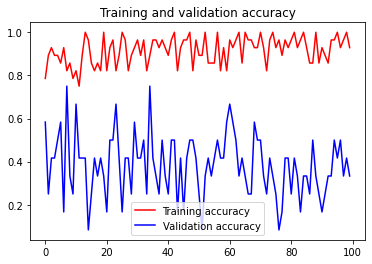

<Figure size 432x288 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

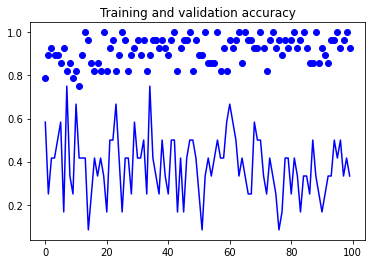

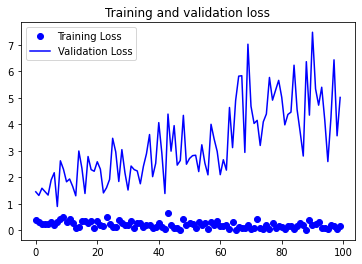

In [59]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()